In [7]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tabulate import tabulate
from spacy.matcher import Matcher


In [8]:
opinions = pd.read_csv('csv_data/preprocesed_files/all_opinions_merged.csv')
# Tworzenie listy krotek
opinions_list = [(row['content'], row['doubleQuality']) for _, row in opinions.iterrows()]
random.shuffle(opinions_list)

In [9]:
#opinions_list=opinions_list[0:3000]
sum_of_values = sum(item[1] for item in opinions_list)
print(sum_of_values)

107


In [10]:
nlp = spacy.load('pl_core_news_md')

# Obiekt PhraseMatcher
matcher = Matcher(nlp.vocab)

patterns = [
    [{"LOWER": {"FUZZY": "lepszy"}}, {"LOWER": {"FUZZY": "niż"}}],
    [{"LOWER": {"FUZZY": "lepszy"}}, {"LOWER": {"FUZZY": "od"}}],
    [{"LOWER": {"FUZZY": "nie"}}, {"LOWER": {"FUZZY": "ma"}}, {"LOWER": {"FUZZY": "już"}}],
    [{"LOWER": {"FUZZY": "na"}}, {"LOWER": {"FUZZY": "rynku"}}],
    [{"LOWER": {"FUZZY": "w"}}, {"LOWER": {"FUZZY": "polskich"}}],
    [{"LOWER": {"FUZZY": "lepszej"}}, {"LOWER": {"FUZZY": "jakosci"}}],
    [{"LOWER": {"FUZZY": "od"}}, {"LOWER": {"FUZZY": "niemca"}}],
    [{"LOWER": {"FUZZY": "nad"}}, {"LOWER": {"FUZZY": "polskimi"}}],
    [{"LOWER": {"FUZZY": "tak"}}, {"LOWER": {"FUZZY": "dobrze"}}, {"LOWER": {"FUZZY": "jak"}}],
    [{"LOWER": {"FUZZY": "jak"}}, {"LOWER": {"FUZZY": "niemiecki"}}],
    [{"LOWER": {"FUZZY": "polskiej"}}, {"LOWER": {"FUZZY": "wersji"}}],
    [{"LOWER": {"FUZZY": "nad"}}, {"LOWER": {"FUZZY": "polskimi"}}],
    [{"LOWER": {"FUZZY": "najlepszy"}}, {"LOWER": {"FUZZY": "bo"}}],
    [{"LOWER": {"FUZZY": "polski"}}, {"LOWER": {"FUZZY": "produkt"}}],
    [{"LOWER": {"FUZZY": "niemieckie"}}, {"LOWER": {"FUZZY": "wydanie"}}],
    [{"LOWER": {"FUZZY": "jest"}}, {"LOWER": {"FUZZY": "niemieckim"}}],
    [{"LOWER": {"FUZZY": "oryginalne"}}, {"LOWER": {"FUZZY": "niemieckie"}}],
    [{"LOWER": {"FUZZY": "z"}}, {"LOWER": {"FUZZY": "niemiec"}}],
    [{"LOWER": {"FUZZY": "to"}}, {"LOWER": {"FUZZY": "niemiecki"}}],
    [{"LOWER": {"FUZZY": "niemiecka"}}, {"LOWER": {"FUZZY": "chemia"}}],
    [{"LOWER": {"FUZZY": "niemiecka"}}, {"LOWER": {"FUZZY": "jakość"}}],
    [{"LOWER": {"FUZZY": "oryginalny"}}, {"LOWER": {"FUZZY": "produkt"}}],
    [{"LOWER": {"FUZZY": "rynek"}}, {"LOWER": {"FUZZY": "zachodni"}}],
    [{"LOWER": {"FUZZY": "lepsza"}}, {"LOWER": {"FUZZY": "niż"}}],
    [{"LOWER": {"FUZZY": "rynek"}}, {"LOWER": {"FUZZY": "polski"}}],
    [{"LOWER": {"FUZZY": "zachodni"}}, {"LOWER": {"FUZZY": "rynek"}}],
    [{"LOWER": {"FUZZY": "niemiecki"}}, {"LOWER": {"FUZZY": "rynek"}}],
    [{"LOWER": {"FUZZY": "jak"}}, {"LOWER": {"FUZZY": "polski"}}],
    [{"LOWER": {"FUZZY": "wyprodukowany"}}, {"LOWER": {"FUZZY": "w"}}],
    [{"LOWER": {"FUZZY": "produkowany"}}, {"LOWER": {"FUZZY": "w"}}, {"LOWER": {"FUZZY": "niemczech"}}],
    [{"LOWER": {"FUZZY": "nie"}}, {"LOWER": {"FUZZY": "dorównują"}}],
    [{"LOWER": {"FUZZY": "polskiej"}}, {"LOWER": {"FUZZY": "wersji"}}],
    [{"LOWER": {"FUZZY": "europę"}}, {"LOWER": {"FUZZY": "wschodnią"}}]
]

matcher.add("DoubleQuality", patterns)

In [11]:
def rule_based_double_quality_search(dataset):

    total_sentences = len(dataset)
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0

    for txt in dataset:
        # Tekst wejściowy jako obiekt typu Document
        doc = nlp(txt[0])

        # Wywołanie metody matcher na obiekcie doc. Zwraca obiekty typu Span
        matches = matcher(doc)
        
        if len(matches) > 0:
            if txt[1] == 1:
                true_positives += 1
            else:
                false_positives += 1
        else:            
            if txt[1] == 0:
                true_negatives += 1
            else:
                false_negatives += 1
    
    
    # Tworzenie listy z danymi
    data = [
        ["Liczba zdań ze zbioru:", total_sentences],
        ["TP:", true_positives],
        ["FN:", false_negatives],
        ["FP:", false_positives],
        ["TN:", true_negatives]
    ]

    # Obliczenie metryk
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
    f1_score = 2 * (precision * recall) / (precision + recall)
    loss = (false_positives + false_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

    # Dodanie metryk do listy danych
    data.extend([
        ["Miary:"],
        ["Precision (precyzja):", precision],
        ["Recall (czułość):", recall],
        ["Accuracy (dokładność):", accuracy],
        ["Loss (strata):", loss],
        ["F1 Score (miara F1):", f1_score]
    ])

    # Wypisanie danych w postaci tabeli
    print(tabulate(data, headers=["Miary","Wartości"], tablefmt="fancy_grid"))

    confusion_matrix = [[true_positives, false_negatives], [false_positives, true_negatives]]

   # Tworzenie etykiet dla macierzy pomyłek
    labels = [["Pozytywna", "Negatywna"], ["Pozytywna", "Negatywna"]]

    # Wykreślenie Confusion Matrix z etykietami
    sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=labels[0], yticklabels=labels[1])
    plt.xlabel("Klasa predykowana")
    plt.ylabel("Klasa rzeczywista")
    plt.title("Tablica pomyłek")
    plt.show()

Liczba zdań ze zbioru:  33197
TP:  65
FN:  42
FP:  1458
TN:  31632
Miary:
Precision:  0.04267892317793828
Recall:  0.6074766355140186
Accuracy:  0.9548151941440491
Loss:  0.04518480585595084
F1:  0.07975460122699386


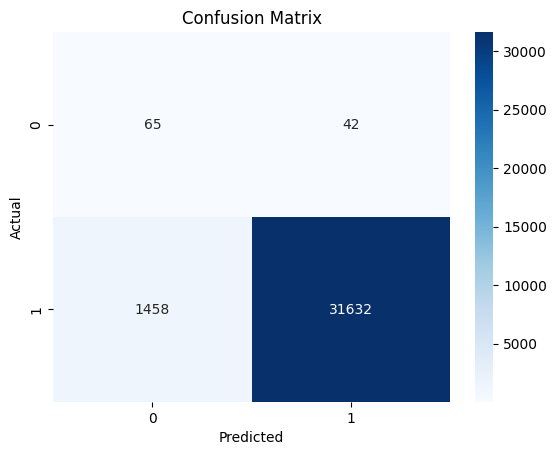

In [12]:
# Oblicz miary dla zbioru anomaly_opinions
rule_based_double_quality_search(opinions_list)